## This is run a Google Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading files

In [ ]:
# !wget --header="Host: www.ncbi.nlm.nih.gov" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7" --header="Referer: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE214611" --header="Cookie: _gid=GA1.2.843222926.1683780721; ncbi_sid=0C4234AB45C74711_0000SID; _ga=GA1.1.1244755766.1683780721; _ga_DP2X732JSX=GS1.1.1683780720.1.1.1683782404.0.0.0; _gat_ncbiSg=1; ncbi_pinger=N4IgDgTgpgbg+mAFgSwCYgFwgAwGEAsATAMwDsAjAGz4Csup+pl52rb7H5IANCAMYAbZHwDWAOygAPAC6ZQxAJyYQVUkwAc2HiHxasqhfirb8+ZYOHips3rWVdblZQDMAhgIDOUE6WXUttur25PiUAHSUkZTqpNjk5BTqQbZKWNo0eiCI0tJgHhgA9AUA7qVhYnwARsjlAgC25ciIYQDmAPYwBS1QbQWobcViAm2uqAUA/K58fAC8AOIAygCihCHM5ABkzm0Qda7SM87IAt68NFxpZ4TKABTZuQCUIAC+vACuQyOoEjJyIMTEFzuLzaYhmLDSCBvU7/IKXf6pFSUNSUQwmTIGIhKWzgkAfYajH42HQ0ZTXM5OLA0VHpXxYAIgZjKTSA178Np1OptMREv7XLDdNqg5QmFxvAQCdIi3iETJ4IhkKi0eiMZgcdXsBwgVbKQUYAByAHl9UsMM5xQIDcaltpCPyQKViuUqjUhg0xE1Wh1bYjyApZaCMdhNKCLip1Phkv97SwaIDbID6WFiOowuSQHH7CR0zRcdTfM9nkA" --header="Connection: keep-alive" "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE214611&format=file" -c -O '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW.tar'

In [ ]:
# !tar -xvf '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW.tar' -C '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/'

In [ ]:
# !cd '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/' && for f in *.tar.gz; do tar -xvzf "$f" -C "$(dirname "$f")"; done

In [ ]:
# !unzip '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping.zip' -d '/content/drive/MyDrive/Samin/PathologicalCells/data/GSE214611_RAW'

## Working with the data

In [2]:
!pip install anndata==0.10.3 scanpy==1.9.6 harmonypy kneed scanorama

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=551932 sha256=b308c0f633d74c31b82361150a3bb498ac73e8b329e624cb624de30132d29b66
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
  Created wheel

In [3]:
import scanpy as sc
import pandas as pd

In [4]:
ROOT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/Infracted Heart Border Zone - GSE214611_RAW'

In [5]:
OUTPUT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/outputs'
FIGURE_PATH = f'{OUTPUT_PATH}/figures'
PROBLEM_KEY = 'ref_0_que_1-7'

In [6]:
metadata_sc = pd.read_csv(f'{ROOT_PATH}/Single-Cell-Spatial-Transcriptomics-for-Border-zone/sn_wc_object_integrated@meta.data.csv', index_col=0)
metadata_sc_t = metadata_sc.rename(index=lambda x: x.split('_')[0])
metadata_sc_t['obs_names'] = metadata_sc_t.index

In [7]:
def get_anndata(mtx_path_id, metadata_orig_id):
    PATH = f'{ROOT_PATH}/{mtx_path_id}'
    ad = sc.read_10x_mtx(PATH)
    ad.obs = ad.obs.rename(index=lambda x: x.split('-')[0])
    A = metadata_sc_t[metadata_sc_t['orig.ident'] == metadata_orig_id]

    ad.obs = ad.obs.merge(A, left_index=True, right_index=True, how='left')

    return ad

In [8]:
def pp_anndata(ad, n_top_genes=None, plot=False):
    ad.var_names_make_unique()

    sc.pp.filter_cells(ad, min_genes=200)
    sc.pp.filter_genes(ad, min_cells=3)

    ad.var['mt'] = ad.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    if plot:
        sc.pl.violin(ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                jitter=0.4, multi_panel=True)
        sc.pl.scatter(ad, x='total_counts', y='pct_counts_mt')
        sc.pl.scatter(ad, x='total_counts', y='n_genes_by_counts')

    # ad = ad[ad.obs.n_genes_by_counts < 6000, :]
    ad = ad[ad.obs.pct_counts_mt <= 5, :]

    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)

    if n_top_genes is not None:
        sc.pp.highly_variable_genes(ad, n_top_genes=n_top_genes)
        ad.raw = ad
        ad = ad[:, ad.var.highly_variable]

    if plot:
        sc.pl.highly_variable_genes(ad)

    # sc.pp.regress_out(ad, ['total_counts', 'pct_counts_mt'])
    # sc.pp.scale(ad, max_value=10)

    return ad

## Prepare training and testing dataset

In [9]:
healthy_celltypes = ['Myh6']
disease_celltypes = ['Ankrd1', 'Xirp2']
imp_celltypes = disease_celltypes + healthy_celltypes

In [10]:
def get_mtx_path_id_metadata_orig_id(problem_key):
    exp_meta_keys = {
        'ref_0_que_1hr': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
            ]
        },
        'ref_0_que_4hr': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn4hr', '4HR'),
            ]
        },
        'ref_0_que_1': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
            ]
        },
        'ref_0_que_3': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
            ]
        },
        'ref_0_que_7': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        },
        'ref_0_que_1-7': {
            'ref': [
                ('snd0_1', 'D0'),
                ('snd0_2', 'D0'),
                ('snd0_3', 'NoMI_Nuclei'),
            ],
            'que': [
                ('sn1hr_1', 'sn1_1'),
                ('sn1hr_2', 'sn1_2'),
                ('sn4hr', '4HR'),
                ('snd1_1', 'D1_MI'),
                ('snd1_2', 'D1_MI_Hrt_nuclei'),
                ('snd1_3', 'D1_IR30_Hrt_nuclei'),
                ('snd1_4', 'WT_IR30_D1_2'),
                ('snd1_5', 'WT_IR30_D1_3'),
                ('snd3_1', 'WT_IR30_D3'),
                ('snd3_2', 'D3F_M_rep1'),
                ('snd3_3', 'D3F_M_rep2'),
                ('snd7_1', 'snD7_1'),
                ('snd7_2', 'snD7_1'),
                ('snd7_3', 'D5_D7'),
            ]
        }
    }

    return exp_meta_keys[problem_key]

In [11]:
exp_meta_keys = get_mtx_path_id_metadata_orig_id(PROBLEM_KEY)

## Prepare problem dataset

In [12]:
import anndata as AD

adatas = {}

for key, item in exp_meta_keys.items():
    for i, (mtx_path_id, metadata_orig_id) in enumerate(item):
        ad = pp_anndata(get_anndata(mtx_path_id, metadata_orig_id))
        ad = ad[ad.obs['final_cluster'].isin(imp_celltypes)]
        dataset_id = f"{key}_{i+1}"
        ad.obs['dataset'] = dataset_id
        ad.obs['datagroup'] = key
        adatas[f"{key}_{i+1}"] = ad

adatas

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = dataset_id
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = dataset_id
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
<ipython-input-12-3ce33b34eb0e>:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['dataset'] = 

{'ref_1': AnnData object with n_obs × n_vars = 1390 × 17676
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'datagroup'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
     uns: 'log1p',
 'ref_2': AnnData object with n_obs × n_vars = 1390 × 20456
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_coun

In [13]:
ad = AD.concat(adatas, label='batch_key')
ad.obs_names_make_unique()
ad

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 14779 × 1426
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'datagroup', 'batch_key'

In [14]:
sc.tl.pca(ad)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1292:

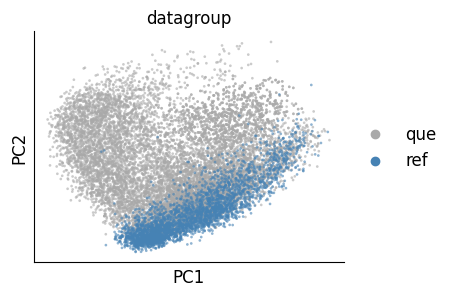

In [15]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'datagroup' categories
custom_palette = [ "#A9A9A9", "#4682B4",]  # SteelBlue and DarkGray

# Map the colors to 'datagroup' categories
ad.uns['datagroup_colors'] = custom_palette

# Reorder 'ad' by 'datagroup' first by 'reference', then by 'query'
ad = ad[ad.obs['datagroup'].argsort(kind='mergesort')]  # Reorder AnnData object

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Generate PCA plot with custom palette
sc.pl.pca(ad, color='datagroup', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.close()


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


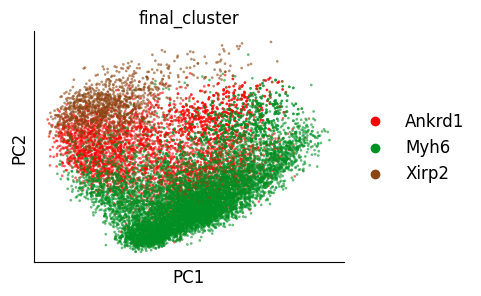

In [16]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#FF0000","#009023", "#8B4513"]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
ad.uns['final_cluster_colors'] = custom_palette

# Reorder 'ad' by 'final_cluster' if needed
ad = ad[ad.obs['final_cluster'].argsort(kind='mergesort')]  # Reorder AnnData object

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='final_cluster', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.close()


## Applying our method

In [17]:
integration_method = 'harmony'
int_method_ext = integration_method if integration_method is not None else ''
int_method_post = ('-' + integration_method) if integration_method is not None else ''

In [18]:
import scanpy.external as sce
sce.pp.harmony_integrate(ad, key='dataset', random_state=100)

2024-11-22 20:19:50,617 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-11-22 20:19:56,640 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-11-22 20:19:56,696 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-11-22 20:20:00,668 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-11-22 20:20:04,688 - harmonypy - INFO - Converged after 2 iterations
INFO:harmonypy:Converged after 2 iterations
/usr/local/lib/python3.10/dist-packages/scanpy/external/pp/_harmony_integrate.py:84: ImplicitModificationWarning: Setting element `.obsm['X_pca_harmony']` of view, initializing view as actual.
  adata.obsm[adjusted_basis] = harmony_out.Z_corr.T


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting

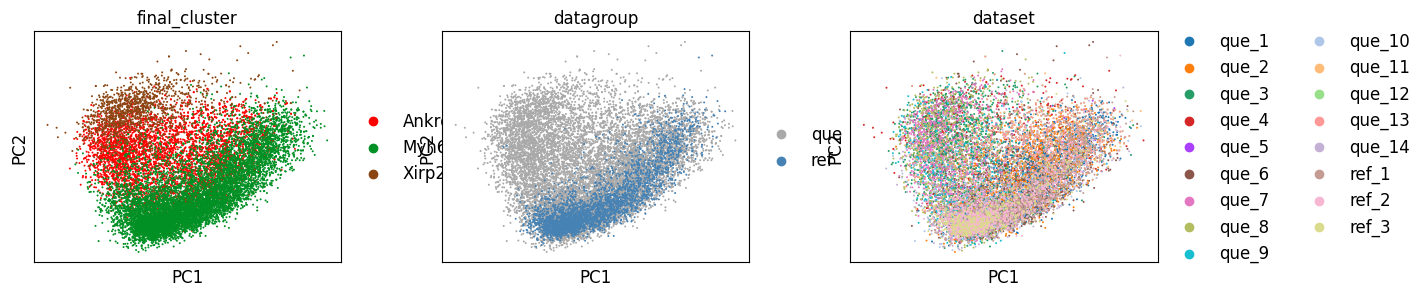

In [19]:
ad_sep_for_harmony_plot = ad.copy()
ad_sep_for_harmony_plot.obsm['X_pca'] = ad.obsm['X_pca_harmony']

sc.pl.pca(ad_sep_for_harmony_plot, color=['final_cluster', 'datagroup', 'dataset'], show=False)
plt.savefig(f'{FIGURE_PATH}/pcas/{PROBLEM_KEY}{int_method_post}.jpg')

In [20]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import gamma

def find_pk(dists_ref_ref, dists_que_ref, k, q=0.9):
    dists_ref_ref_ = dists_ref_ref[:, k+1]
    dists_que_ref_ = dists_que_ref[:, k]

    a_fit, loc_fit, scale_fit = gamma.fit(dists_ref_ref_)
    thres = gamma.ppf(q, a=a_fit, loc=loc_fit, scale=scale_fit)

    true_positive_ratio = np.mean(dists_ref_ref_ < thres)
    outlier_ratio = np.mean(dists_que_ref_ > thres)

    return true_positive_ratio, outlier_ratio

In [21]:
start_k = 5
end_k = 50

def get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, q):

    K_outlier_ratio = []

    for k in range(start_k, end_k):
        tp, o = find_pk(dists_ref_ref, dists_que_ref, k, q)
        K_outlier_ratio.append((k, o))

    return K_outlier_ratio

In [22]:
def get_q_outlier_ratio_for_k(k, dists_ref_ref, dists_que_ref):
    q_outlier_ratio = []

    for iq in range(850, 1001, 5):
        q = 0.001 * iq
        tp, o = find_pk(dists_ref_ref, dists_que_ref, k, q)
        q_outlier_ratio.append((q, o))

    return q_outlier_ratio

In [23]:
ad_ref = ad[ad.obs['datagroup'].isin(['ref'])]
ad_que = ad[ad.obs['datagroup'].isin(['que'])]

## Find optimal number of PCs

In [26]:
import numpy as np
import scanpy as sc
from scipy.spatial.distance import cdist
from scipy.stats import gamma
from kneed import KneeLocator
from typing import List
from scanpy import AnnData
import scanpy.external as sce
from numpy.typing import ArrayLike

In [42]:
def find_optimal_k(dists_ref_ref, dists_que_ref):
    outlier_ratios_for_k = []

    ks = np.arange(5, 51)
    initial_p_vals = [0.1, 0.05, 0.01]

    for k in ks:
        reference_kth_distances = dists_ref_ref[:, k + 1]
        query_kth_distances = dists_que_ref[:, k]

        a_fit, loc_fit, scale_fit = gamma.fit(reference_kth_distances)
        q = 1 - np.array(initial_p_vals)
        thresholds = gamma.ppf(q, a=a_fit, loc=loc_fit, scale=scale_fit)
        outlier_ratios = np.mean(query_kth_distances[:, None] > thresholds, axis=0)
        outlier_ratios_for_k.append(outlier_ratios)

    outlier_ratios_for_k = np.array(outlier_ratios_for_k)
    mean_outlier_ratio_for_k = np.mean(outlier_ratios_for_k, axis=1)
    index_of_optimal = np.argmax(mean_outlier_ratio_for_k)
    optimal_k = ks[index_of_optimal]

    return optimal_k

In [43]:
def find_optimal_p_val(dists_ref_ref, dists_que_ref, optimal_k):
    k = optimal_k
    reference_kth_distances = dists_ref_ref[:, k + 1]
    query_kth_distances = dists_que_ref[:, k]

    a_fit, loc_fit, scale_fit = gamma.fit(reference_kth_distances)
    qs = np.arange(850, 1001, 5) * 0.001
    thresholds = gamma.ppf(qs, a=a_fit, loc=loc_fit, scale=scale_fit)
    outlier_ratios = np.mean(query_kth_distances[:, None] > thresholds, axis=0)

    ps = 1 - qs
    kneedle = KneeLocator(
        ps, outlier_ratios, curve="concave", direction="increasing"
    )
    optimal_p = kneedle.knee + 0.005 if kneedle.knee else None

    return optimal_p

In [67]:
obsm_str = 'X_pca_harmony'

def find_optimal_parameters(n_comps):
    params = []
    for n_comps in range(2, n_comps+1):
        X_ref = ad_ref.obsm[obsm_str][:, :n_comps]
        X_que = ad_que.obsm[obsm_str][:, :n_comps]

        dists_ref_ref = cdist(X_ref, X_ref)
        dists_ref_ref = np.sort(dists_ref_ref, axis=1)

        dists_que_ref = cdist(X_que, X_ref)
        dists_que_ref = np.sort(dists_que_ref, axis=1)

        optimal_k = find_optimal_k(dists_ref_ref, dists_que_ref)
        optimal_p = find_optimal_p_val(dists_ref_ref, dists_que_ref, optimal_k)

        dist_ref_ref = dists_ref_ref[:, optimal_k+1]
        dist_que_ref = dists_que_ref[:, optimal_k]

        a_fit, loc_fit, scale_fit = gamma.fit(dist_ref_ref)
        pct = 1 - optimal_p
        thres = gamma.ppf(pct, a=a_fit, loc=loc_fit, scale=scale_fit)
        outlier_ratio = np.mean(dist_que_ref > thres)

        param = {
            'n_comps': n_comps,
            'optimal_k': optimal_k,
            'optimal_p': optimal_p,
            'threshold': thres,
            'outlier_ratio': outlier_ratio
        }
        params.append(param)
        print(param)


    return params

In [68]:
%%time
params = find_optimal_parameters(25)

{'n_comps': 2, 'optimal_k': 7, 'optimal_p': 0.01500000000000001, 'threshold': 1.1535371979996183, 'outlier_ratio': 0.41734204793028323}
{'n_comps': 3, 'optimal_k': 5, 'optimal_p': 0.020000000000000014, 'threshold': 1.7120278630338228, 'outlier_ratio': 0.46797385620915033}
{'n_comps': 4, 'optimal_k': 5, 'optimal_p': 0.020000000000000014, 'threshold': 2.349858568369299, 'outlier_ratio': 0.45481481481481484}
{'n_comps': 5, 'optimal_k': 5, 'optimal_p': 0.020000000000000014, 'threshold': 3.041849142036715, 'outlier_ratio': 0.4393899782135076}
{'n_comps': 6, 'optimal_k': 5, 'optimal_p': 0.020000000000000014, 'threshold': 3.539830508407954, 'outlier_ratio': 0.43625272331154685}
{'n_comps': 7, 'optimal_k': 6, 'optimal_p': 0.020000000000000014, 'threshold': 4.289991948972238, 'outlier_ratio': 0.4077559912854031}
{'n_comps': 8, 'optimal_k': 5, 'optimal_p': 0.02500000000000002, 'threshold': 4.393900709983424, 'outlier_ratio': 0.42169934640522877}
{'n_comps': 9, 'optimal_k': 5, 'optimal_p': 0.0250

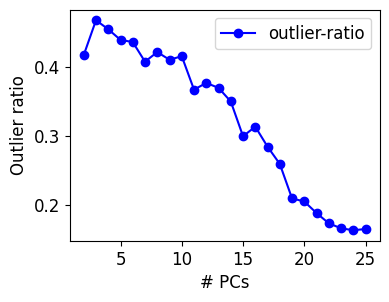

In [69]:
x_values = []
y_values = []
for param in params:
    x_values.append(param['n_comps'])
    y_values.append(param['outlier_ratio'])
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='outlier-ratio')
plt.legend()
plt.xlabel('# PCs')
plt.ylabel('Outlier ratio')

plt.savefig(f'{FIGURE_PATH}/outlier-ratios-pc/{PROBLEM_KEY}{int_method_post}.jpg')
plt.show()

## Plot for best parameters

In [47]:
n_comps = 3

obsm_str = 'X_pca_harmony'

X_ref = ad_ref.obsm[obsm_str][:, :n_comps]
X_que = ad_que.obsm[obsm_str][:, :n_comps]

In [48]:
dists_ref_ref = cdist(X_ref, X_ref)
dists_ref_ref = np.sort(dists_ref_ref, axis=1)

dists_que_ref = cdist(X_que, X_ref)
dists_que_ref = np.sort(dists_que_ref, axis=1)

In [49]:
%%time

K_outlier_ratio_1 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.9)
K_outlier_ratio_2 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.95)
K_outlier_ratio_3 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.99)

CPU times: user 5.93 s, sys: 14.9 ms, total: 5.95 s
Wall time: 5.94 s


In [50]:
average_outlier_ratios = [(a[1]+b[1]+c[1])/3 for a, b, c in zip(K_outlier_ratio_1, K_outlier_ratio_2, K_outlier_ratio_3)]
max_index = np.argmax(average_outlier_ratios)
optimal_k = max_index + start_k
print("Optimal k: ", optimal_k)

Optimal k:  5


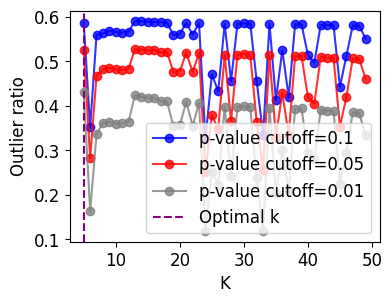

In [51]:
x_values, y_values = zip(*K_outlier_ratio_1)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', alpha=.8, label='p-value cutoff=0.1')

x_values, y_values = zip(*K_outlier_ratio_2)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', alpha=.8, label='p-value cutoff=0.05')

x_values, y_values = zip(*K_outlier_ratio_3)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='grey', alpha=.8, label='p-value cutoff=0.01')

plt.axvline(optimal_k, color='purple', linestyle='--', label='Optimal k')
plt.xlabel('K')
plt.ylabel('Outlier ratio')
plt.legend(loc='lower right')

# Show the plot
plt.savefig(f'{FIGURE_PATH}/optimal-k/{PROBLEM_KEY}{int_method_post}.jpg')
plt.show()

In [52]:
q_outlier_ratio = get_q_outlier_ratio_for_k(optimal_k, dists_ref_ref, dists_que_ref)

In [53]:
x_values, y_values = zip(*q_outlier_ratio)
x_values = [1 - x for x in x_values]

In [54]:
from kneed import KneeLocator

kneedle = KneeLocator(x_values, y_values, curve='concave', direction='increasing')
knee = kneedle.knee
optimal_p = knee + .005
print(optimal_p)

0.020000000000000014


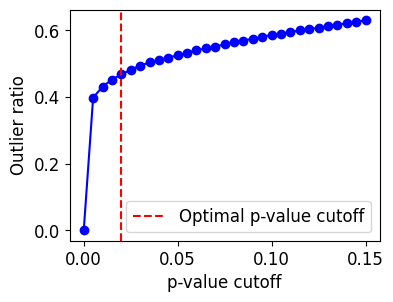

In [55]:
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.axvline(optimal_p, color='r', linestyle='--', label='Optimal p-value cutoff')
plt.legend()

plt.xlabel('p-value cutoff')
plt.ylabel('Outlier ratio')

plt.savefig(f'{FIGURE_PATH}/optimal-p/{PROBLEM_KEY}{int_method_post}.jpg')
plt.show()

In [56]:
%%time
import numpy as np
from scipy.spatial.distance import cdist

k = optimal_k

dist_ref_ref = dists_ref_ref[:, k+1]
dist_que_ref = dists_que_ref[:, k]

CPU times: user 19 µs, sys: 2 µs, total: 21 µs
Wall time: 23.4 µs


In [57]:
from scipy.stats import gamma

a_fit, loc_fit, scale_fit = gamma.fit(dist_ref_ref)
pct = 1 - optimal_p
thres = gamma.ppf(pct, a=a_fit, loc=loc_fit, scale=scale_fit)
predicted_diseased = dist_que_ref > thres

print(thres, np.mean(predicted_diseased))

1.7120278630338228 0.46797385620915033


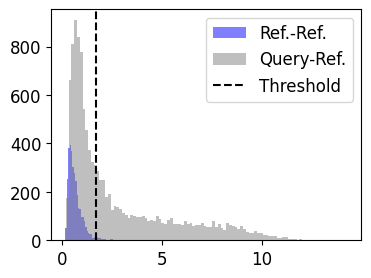

In [58]:
import matplotlib.pyplot as plt

plt.hist(dist_ref_ref, bins=100, alpha=.5, color='blue', label='Ref.-Ref.')
plt.hist(dist_que_ref, bins=100, alpha=.5, color='gray', label='Query-Ref.')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.savefig(f'{FIGURE_PATH}/distance-distributions/ref-que-{PROBLEM_KEY}{int_method_post}.jpg')
plt.show()

In [59]:
dist_que_healthy = dist_que_ref[ad_que.obs['final_cluster'].isin(healthy_celltypes)]
dist_que_disease = dist_que_ref[ad_que.obs['final_cluster'].isin(disease_celltypes)]

np.mean(dist_que_healthy < thres), np.mean(dist_que_disease > thres)

(0.8316996178767238, 0.7985703812316716)

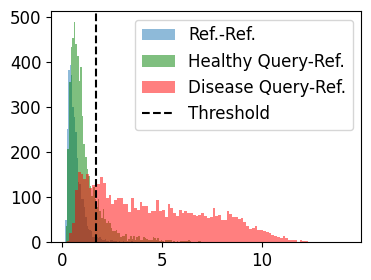

In [60]:
plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Ref.-Ref.')
plt.hist(dist_que_healthy, bins=100, alpha=.5, color='green', label='Healthy Query-Ref.')
plt.hist(dist_que_disease, bins=100, alpha=.5, color='red', label='Disease Query-Ref.')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()

plt.savefig(f'{FIGURE_PATH}/distance-distributions/ref-healthy-diseased-{PROBLEM_KEY}{int_method_post}.jpg')
plt.show()

## Picking best k and cut-off threshold

In [61]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import gamma

dists_ref_ref = cdist(X_ref, X_ref)
dists_ref_ref = np.sort(dists_ref_ref, axis=1)

dists_que_ref = cdist(X_que, X_ref)
dists_que_ref = np.sort(dists_que_ref, axis=1)


def find_pk(dists_ref_ref, dists_que_ref, k, q=0.9):
    dists_ref_ref_ = dists_ref_ref[:, k+1]
    dists_que_ref_ = dists_que_ref[:, k]

    a_fit, loc_fit, scale_fit = gamma.fit(dists_ref_ref_)
    thres = gamma.ppf(q, a=a_fit, loc=loc_fit, scale=scale_fit)

    true_positive_ratio = np.mean(dists_ref_ref_ < thres)
    outlier_ratio = np.mean(dists_que_ref_ > thres)

    return true_positive_ratio, outlier_ratio

In [ ]:
start_k = 5
end_k = 50

def get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, q):

    K_outlier_ratio = []

    for k in range(start_k, end_k):
        tp, o = find_pk(dists_ref_ref, dists_que_ref, k, q)
        K_outlier_ratio.append((k, o))

    return K_outlier_ratio

In [ ]:
%%time

K_outlier_ratio_1 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.9)
K_outlier_ratio_2 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.95)
K_outlier_ratio_3 = get_k_outlier_ratio_for_q(dists_ref_ref, dists_que_ref, 0.99)

CPU times: user 5.93 s, sys: 13.7 ms, total: 5.94 s
Wall time: 5.93 s


In [ ]:
average_outlier_ratios = [(a[1]+b[1]+c[1])/3 for a, b, c in zip(K_outlier_ratio_1, K_outlier_ratio_2, K_outlier_ratio_3)]
max_index = np.argmax(average_outlier_ratios)
optimal_k = max_index + start_k
print("Optimal k: ", optimal_k)

Optimal k:  5


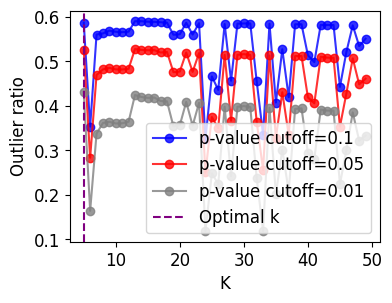

In [ ]:
x_values, y_values = zip(*K_outlier_ratio_1)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', alpha=.8, label='p-value cutoff=0.1')

x_values, y_values = zip(*K_outlier_ratio_2)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', alpha=.8, label='p-value cutoff=0.05')

x_values, y_values = zip(*K_outlier_ratio_3)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='grey', alpha=.8, label='p-value cutoff=0.01')

plt.axvline(optimal_k, color='purple', linestyle='--', label='Optimal k')
plt.xlabel('K')
plt.ylabel('Outlier ratio')
plt.legend(loc='lower right')

# Show the plot
plt.savefig(f'{FIGURE_PATH}/optimal-k/{PROBLEM_KEY}.jpg')
plt.show()

In [ ]:
def get_q_outlier_ratio_for_k(k, dists_ref_ref, dists_que_ref):
    q_outlier_ratio = []

    for iq in range(850, 1001, 5):
        q = 0.001 * iq
        tp, o = find_pk(dists_ref_ref, dists_que_ref, k, q)
        q_outlier_ratio.append((q, o))

    return q_outlier_ratio

In [ ]:
q_outlier_ratio = get_q_outlier_ratio_for_k(optimal_k, dists_ref_ref, dists_que_ref)

In [ ]:
## Previously used k=20 and p=0.05

In [ ]:
x_values, y_values = zip(*q_outlier_ratio)
x_values = [1 - x for x in x_values]

In [ ]:
from kneed import KneeLocator

kneedle = KneeLocator(x_values, y_values, curve='concave', direction='increasing')
knee = kneedle.knee
optimal_p = knee + .005
print(optimal_p)

0.020000000000000014


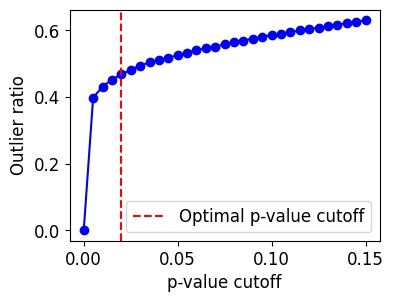

In [ ]:
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.axvline(optimal_p, color='r', linestyle='--', label='Optimal p-value cutoff')
plt.legend()

plt.xlabel('p-value cutoff')
plt.ylabel('Outlier ratio')

plt.savefig(f'{FIGURE_PATH}/optimal-p/{PROBLEM_KEY}.jpg')
plt.show()

<ipython-input-112-7b065d0f380b>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_que.obs['disease_prediction'] = ['diseased' if d else 'healthy' for d in predicted_diseased]
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecat

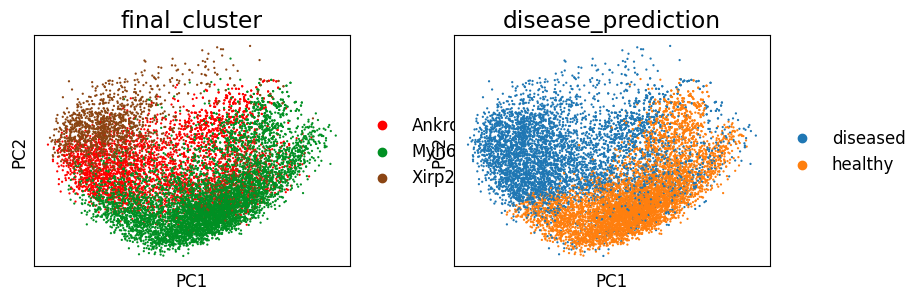

In [ ]:
ad_que.obs['disease_prediction'] = ['diseased' if d else 'healthy' for d in predicted_diseased]
sc.tl.pca(ad_que)
sc.pl.pca(ad_que, color=['final_cluster', 'disease_prediction'])

In [ ]:
plt.rcParams['font.size'] = 14

<Axes: xlabel='disease_prediction', ylabel='final_cluster'>

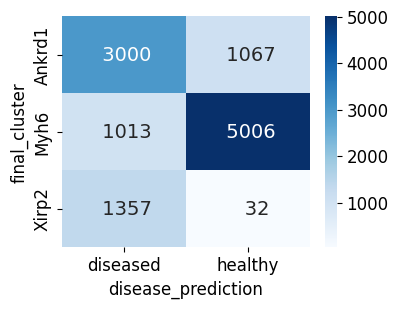

In [ ]:
import seaborn as sns
cmtx = sc.metrics.confusion_matrix("final_cluster", "disease_prediction", ad_que.obs, normalize=False)
sns.heatmap(cmtx, annot=True, fmt='5g', cmap='Blues')

In [ ]:
true_labels = ad_que.obs['final_cluster'].isin(disease_celltypes).to_numpy()
predicted_labels = ad_que.obs['disease_prediction'].isin(['diseased']).to_numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8159477124183007
Precision: 0.8113594040968343
Recall: 0.7985703812316716
F1-score: 0.8049140956955477


AUC: 0.8987564854500338
AUPR: 0.9005216329149406


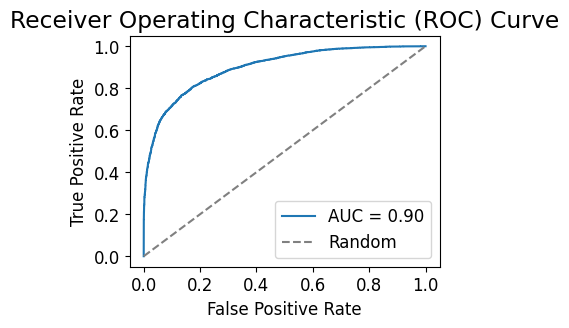

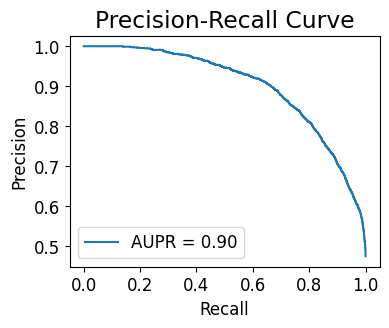

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

y_true = true_labels
y_scores = dist_que_ref

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)
print("AUC:", auc)

# Calculate AUPR
aupr = average_precision_score(y_true, y_scores)
print("AUPR:", aupr)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, label=f'AUPR = {aupr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Finding differentially expressed genes

In [ ]:
ad_ref.obs['disease_prediction'] = 'reference'

<ipython-input-69-d15c51e7ac88>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_ref.obs['disease_prediction'] = 'reference'


In [ ]:
ad_joint = AD.concat([ad_ref, ad_que], label='batch_key')
ad_joint.obs_names_make_unique()
ad_joint

AnnData object with n_obs × n_vars = 14779 × 1426
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.6', 'original', 'sample', 'integrated_snn_res.1.2', 'final_cluster', 'orig_id', 'sample_id', 'neworig', 'orig_id2', 'percent.mt', 'total', 'obs_names', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', 'datagroup', 'batch_key', 'disease_prediction'
    obsm: 'X_pca', 'X_pca_harmony'

In [ ]:
sc.tl.rank_genes_groups(ad_joint, groupby='disease_prediction', method='wilcoxon', groups=['diseased'], reference='reference')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


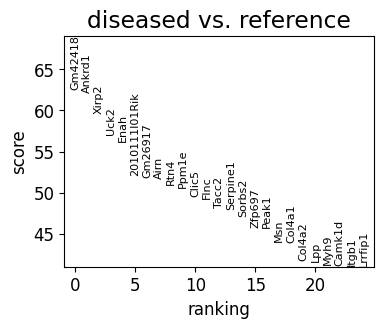

In [ ]:
sc.pl.rank_genes_groups(ad_joint, n_genes=25)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


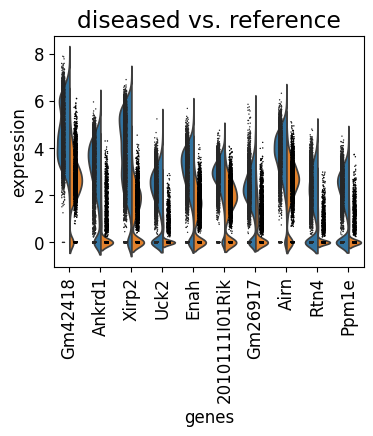

In [ ]:
sc.pl.rank_genes_groups_violin(ad_joint, n_genes=10)

categories: diseased, healthy, reference
var_group_labels: diseased


/usr/local/lib/python3.10/dist-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

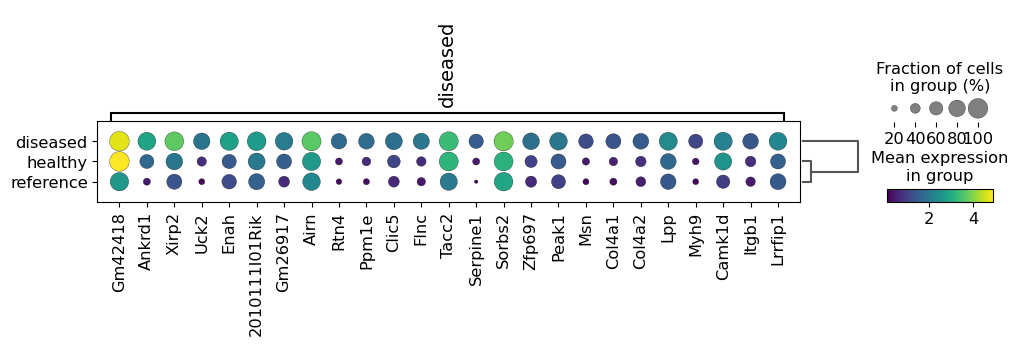

In [ ]:
sc.pl.rank_genes_groups_dotplot(ad_joint, n_genes=25, groupby='disease_prediction', cmap='viridis')